<a href="https://colab.research.google.com/github/maqbuul/college/blob/main/lstm_for_sentiment_analysis_and_load_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

from gensim.models import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

from keras.utils import pad_sequences

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter


In [ ]:
data_train = pd.read_csv("SentimentAnalysisTrain.csv")
data_test = pd.read_csv("SentimentAnalysisTest.csv")

In [ ]:
data_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km�),Density (P/Km�)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
data_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely --...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
train_data = data_train[['selected_text','sentiment']]

#cleaning of test data

In [ ]:
test_data = data_test[['text','sentiment']]

In [ ]:
test_data['text'] = test_data['text'].apply(lambda x: x.lower())
test_data['text'] = test_data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

C:\Users\me\AppData\Local\Temp\ipykernel_11464\3608860882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].apply(lambda x: x.lower())
C:\Users\me\AppData\Local\Temp\ipykernel_11464\3608860882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


In [ ]:
 df = train_data

In [ ]:
df['selected_text'] = df['selected_text'].apply(str)

C:\Users\me\AppData\Local\Temp\ipykernel_11464\290089356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selected_text'] = df['selected_text'].apply(str)


In [ ]:
input_data = []

for i in range(df.shape[0]):
  input_data.append(df['selected_text'][i].split())

In [ ]:
input_data[0]

['I`d', 'have', 'responded,', 'if', 'I', 'were', 'going']

In [ ]:
model = Word2Vec(
        input_data,
        vector_size=300,
        window=10,
        min_count=2,
        workers=10)

In [ ]:
vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)

In [ ]:
len(labels)

9517

In [ ]:
labels[:50]

array(['to', 'I', 'the', 'a', 'my', 'i', 'and', 'you', 'is', 'in', 'for',
       'it', 'of', 'on', 'have', 'me', 'so', 'that', 'be', 'but', 'with',
       'not', 'I`m', 'at', 'just', 'was', 'good', 'get', 'like', 'love',
       'are', 'this', 'all', 'out', 'day', 'up', 'go', 'no', 'your', 'do',
       'got', 'don`t', 'going', 'miss', '****', 'from', 'now', 'work',
       '-', 'really'], dtype='<U26')

In [ ]:
model.wv.most_similar(positive=["good"])

[('having', 0.9996640086174011),
 ('fun', 0.9996562600135803),
 ('pretty', 0.9995763301849365),
 ('feeling', 0.9995351433753967),
 ('nice', 0.9994869232177734),
 ('Its', 0.9994701743125916),
 ('its', 0.9994432330131531),
 ('Not', 0.9994136095046997),
 ('it`s', 0.9994006156921387),
 ('This', 0.9993513226509094)]

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(model)

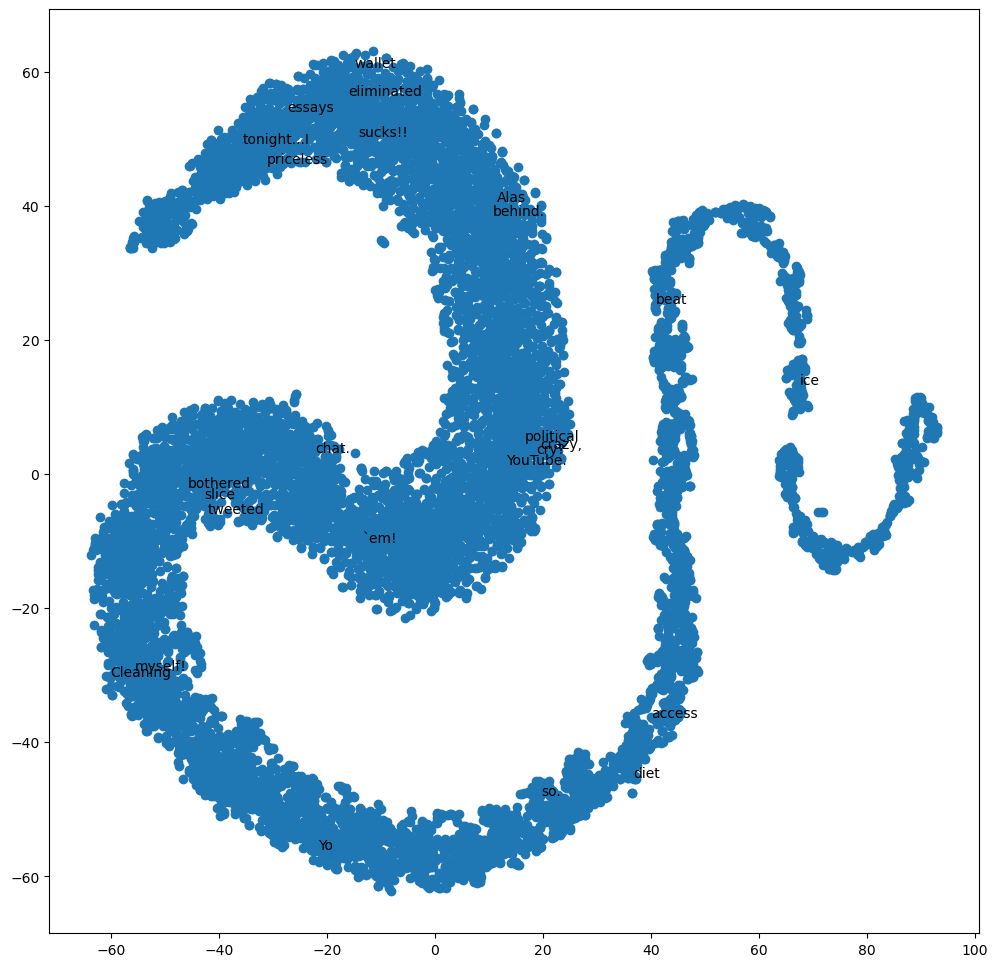

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


plot_with_matplotlib(x_vals, y_vals, labels)

In [ ]:
df['sentiment']

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(df['selected_text'].values)

X = tokenizer.texts_to_sequences(df['selected_text'].values)
X = pad_sequences(X)

In [ ]:
X.shape

(27481, 34)

In [ ]:
inputs = Input(X.shape[1])
x = Embedding(2000, 128,input_length = X.shape[1])(inputs)
x = SpatialDropout1D(0.4)(x)
x = LSTM(196, dropout=0.2, recurrent_dropout=0.2)(x)
outputs = Dense(3, activation = 'softmax')(x)
model = Model(inputs, outputs)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 embedding (Embedding)       (None, 34, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 34, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511391 (1.95 MB)
Trainable params: 511391 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________

In [ ]:
y = pd.get_dummies(df['sentiment']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

# print X , y Shape
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(18412, 34) (18412, 3)
(9069, 34) (9069, 3)


In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, verbose = 1)

Epoch 1/10
576/576 [==============================] - 82s 131ms/step - loss: 0.6151 - accuracy: 0.7402
Epoch 2/10
576/576 [==============================] - 75s 130ms/step - loss: 0.4343 - accuracy: 0.8305
Epoch 3/10
576/576 [==============================] - 77s 133ms/step - loss: 0.3927 - accuracy: 0.8458
Epoch 4/10
576/576 [==============================] - 76s 131ms/step - loss: 0.3667 - accuracy: 0.8574
Epoch 5/10
576/576 [==============================] - 66s 115ms/step - loss: 0.3481 - accuracy: 0.8659
Epoch 6/10
576/576 [==============================] - 70s 122ms/step - loss: 0.3270 - accuracy: 0.8727
Epoch 7/10
576/576 [==============================] - 74s 129ms/step - loss: 0.3049 - accuracy: 0.8836
Epoch 8/10
576/576 [==============================] - 76s 131ms/step - loss: 0.2915 - accuracy: 0.8855
Epoch 9/10
576/576 [==============================] - 76s 132ms/step - loss: 0.2783 - accuracy: 0.8930
Epoch 10/10
576/576 [==============================] - 78s 135ms/step - l

In [ ]:
score,acc = model.evaluate(X_test, y_test, verbose = 1, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

284/284 [==============================] - 8s 25ms/step - loss: 0.5306 - accuracy: 0.8211
score: 0.53
acc: 0.82


# Electricity load prediction

In [ ]:
df = pd.read_csv('Electricity_load_forecasting.csv' )

In [ ]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 1:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 2:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 3:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 4:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 5:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
df.isna().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [ ]:
df.shape

(43775, 17)

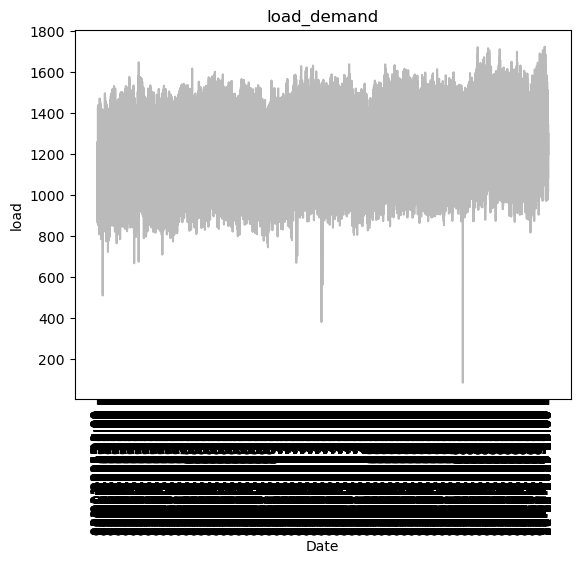

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['nat_demand'], color='darkgray', alpha=0.8, label='daily cases')
ax.set_xlabel('Date')
ax.set_ylabel('load')
ax.set_title('load_demand')
ax.set_xticks([i for i in list(df['datetime'])[::10]])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
columns_to_take = [i for i in df.columns if i not in ['datetime', 'nat_demand']]
# columns_to_take = [i for i in covid.columns if i not in ['Date', 'Daily Confirmed', 'Cumulative Deaths', 'Tested positive demise','Intensive Care Unit (ICU)','Requires Oxygen Supplementation or Unstable','Perc population completed at least one dose', 'Perc population completed vaccination', 'Sinovac vaccine doses','Number taken booster shots', 'Perc population taken booster shots']]


In [ ]:
X = df.loc[:, columns_to_take]
y = df['nat_demand']

In [ ]:
def make_lags(df, lags):
    ret_df = pd.concat({f'lag_{i}_':df.shift(i) for i in range(1,lags+1)},axis=1)
    columns = [''.join(col).strip() for col in ret_df.columns.values]
    ret_df.columns = columns
    return ret_df


In [ ]:
X.dropna(inplace=True)
y, X = y.align(X, join='inner')
X = np.asarray(X).astype('float32')

In [ ]:
X = pd.DataFrame(X)
y = list(y)

In [ ]:
time_stamp = 7

new_data = []
new_y = []

for i in range(time_stamp, X.shape[0]):
  row = list(X.iloc[i])
  out = y[i]

  new_data_temp = [row]
  new_y.append(y[i])
  for j in range(time_stamp-1):
    row = list(X.iloc[i-j-1])
    new_data_temp.append(row)

  new_data_temp = np.array(new_data_temp)
  new_data.append(new_data_temp)

In [ ]:
new_load = np.array(new_data)
y = new_y
new_load.shape, len(new_y)

((43768, 7, 15), 43768)

In [ ]:
input = Input(new_load.shape[1:])
x = LSTM(100, return_sequences=True)(input)
x = LSTM(100, return_sequences=True)(x)
x = LSTM(100)(x)
x = Dense(16)(x)
x = Dense(8)(x)
output = Dense(1, activation='linear')(x)
model = Model(input,output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 15)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 100)            46400     
                                                                 
 lstm_5 (LSTM)               (None, 7, 100)            80400     
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 16)                1616      
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9   

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(new_load, np.array(y), epochs=50)

Epoch 1/50
1368/1368 [==============================] - 46s 31ms/step - loss: 10665.9316
Epoch 2/50
1368/1368 [==============================] - 43s 31ms/step - loss: 10645.3281
Epoch 3/50
1368/1368 [==============================] - 40s 29ms/step - loss: 10620.8711
Epoch 4/50
1368/1368 [==============================] - 42s 31ms/step - loss: 10591.6416
Epoch 5/50
1368/1368 [==============================] - 42s 31ms/step - loss: 10595.3252
Epoch 6/50
1368/1368 [==============================] - 44s 32ms/step - loss: 10568.0205
Epoch 7/50
1368/1368 [==============================] - 49s 36ms/step - loss: 10503.0918
Epoch 8/50
1368/1368 [==============================] - 45s 33ms/step - loss: 10546.1494
Epoch 9/50
1368/1368 [==============================] - 45s 33ms/step - loss: 10451.1279
Epoch 10/50
1368/1368 [==============================] - 46s 34ms/step - loss: 10492.4482
Epoch 11/50
1368/1368 [==============================] - 46s 33ms/step - loss: 10427.0371
Epoch 12/50
1368/13

1368/1368 [==============================] - 20s 14ms/step


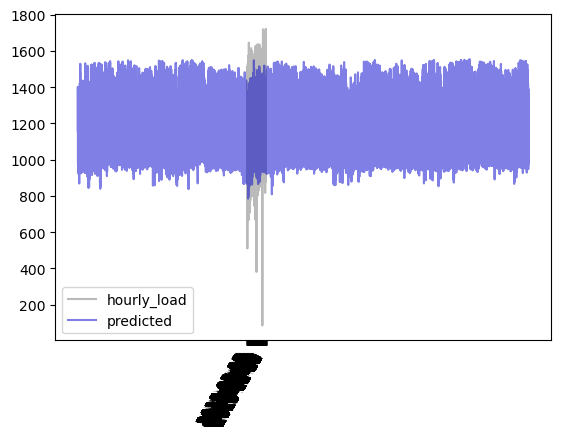

In [ ]:
y_pred = pd.Series(model.predict(new_load)[:,0])

# plotting
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df['datetime'], df['nat_demand'], color='darkgray', alpha=0.8, label='hourly_load')
ax.plot(y_pred, color='mediumblue', label='predicted', alpha= 0.5)
plt.legend()
ax.set_xticks([i for i in




               list(df['datetime'])[::40]])
plt.xticks(rotation = 60)
plt.show()